<a href="https://colab.research.google.com/github/AbnerSilvaBarbosa/DIO-IA/blob/main/calculo_metricas_avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset de câncer de mama
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression(max_iter=10000)  # Aumentar o número de iterações para garantir a convergência
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [8]:
# Extrair Verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos e Falsos Negativos
VN, FP, FN, VP = conf_matrix.ravel()

In [9]:
# Calcular as métricas
sensibilidade = VP / (VP + FN)
especificidade = VN / (VN + FP)
acuracia = (VP + VN) / (VP + VN + FP + FN)
precisao = VP / (VP + FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

# Exibir as métricas
print(f"Sensibilidade: {sensibilidade:.2f}")
print(f"Especificidade: {especificidade:.2f}")
print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"F-score: {f_score:.2f}")

Sensibilidade: 0.99
Especificidade: 0.91
Acurácia: 0.96
Precisão: 0.95
F-score: 0.97


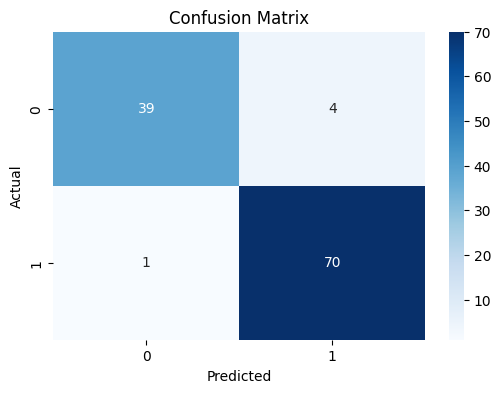

In [7]:
# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()